# Figures for Fox et al. "Exceptional freshening and cooling in theeastern subpolar North Atlantic caused by reduced Labrador Sea surface heat loss."

### Figures 4--7


## Technical preamble

In [1]:
# import matplotlib.colors as colors
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
import seaborn as sns
# from matplotlib.colors import ListedColormap
import cmocean as co
import pandas as pd
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy
import seawater as sw

from matplotlib import colors as c
from matplotlib import ticker
# from xhistogram.xarray import histogram

In [2]:
sns.set(style="darkgrid")

xr.set_options(keep_attrs=True)
np.warnings.filterwarnings('ignore')

sns.set_palette("colorblind")
xr.set_options(keep_attrs=True);

plt.rc('font', size=8) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=8) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend
plt.rc('savefig', dpi=600)       # higher res outputs

In [3]:
# from dask.distributed import Client

In [4]:
# client = Client(n_workers=1, threads_per_worker=8, memory_limit=48e9)
# client

_(Click on the link above if you want to see the Dask cluster in action.)_

## Set up paths and read in trajectory data

In [5]:
# parameters
project_path = Path.cwd() / '..' / '..' 
project_path = project_path.resolve()

inputPath = Path('data/processed/sumsAndMeans/noNorth/')
input_data_path = project_path / inputPath

histogramPath = project_path / 'data' / 'processed' / 'transitTimes' / 'noNorth'

# output figures path
figure_path = Path("reports/figures/coldBlob/final/")


## Load data

## Load track sums and means data

We'll first find all the relevant files and then open them as a virtual contiguous dataset.

In [6]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_sum_0 = list(sorted(Path(input_data_path).glob(f"total_sum_0_????.nc/")))
files_labcu_sum_0 = list(sorted(Path(input_data_path).glob(f"labcu_sum_0_????.nc/")))
files_gulfs_sum_0 = list(sorted(Path(input_data_path).glob(f"gulfs_sum_0_????.nc/")))
files_other_sum_0 = list(sorted(Path(input_data_path).glob(f"other_sum_0_????.nc/")))
files_lc60w_sum_0 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_0_????.nc/")))
files_lcdir_sum_0 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_0_????.nc/")))


In [7]:
total_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_total_sum_0],
    dim="time",
)
labcu_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_sum_0],
    dim="time",
)
gulfs_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_sum_0],
    dim="time",
)
other_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_other_sum_0],
    dim="time",
)
lc60w_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_sum_0],
    dim="time",
)
lcdir_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_sum_0],
    dim="time",
)


In [8]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_sum_1 = list(sorted(Path(input_data_path).glob(f"total_sum_1_????.nc/")))
files_labcu_sum_1 = list(sorted(Path(input_data_path).glob(f"labcu_sum_1_????.nc/")))
files_gulfs_sum_1 = list(sorted(Path(input_data_path).glob(f"gulfs_sum_1_????.nc/")))
files_other_sum_1 = list(sorted(Path(input_data_path).glob(f"other_sum_1_????.nc/")))
files_lc60w_sum_1 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_1_????.nc/")))
files_lcdir_sum_1 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_1_????.nc/")))


In [9]:
total_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_total_sum_1],
    dim="time",
)
labcu_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_sum_1],
    dim="time",
)
gulfs_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_sum_1],
    dim="time",
)
other_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_other_sum_1],
    dim="time",
)
lc60w_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_sum_1],
    dim="time",
)
lcdir_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_sum_1],
    dim="time",
)


In [10]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"total_sum_sourcetime_????.nc/")))
files_labcu_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"labcu_sum_sourcetime_????.nc/")))
files_gulfs_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"gulfs_sum_sourcetime_????.nc/")))
files_other_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"other_sum_sourcetime_????.nc/")))
files_lc60w_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"lc60w_sum_sourcetime_????.nc/")))
files_lcdir_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"lcdir_sum_sourcetime_????.nc/")))


In [11]:
total_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_total_sum_sourcetime],
    dim="year",
).sum(dim='year')
labcu_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_sum_sourcetime],
    dim="year",
).sum(dim='year')
gulfs_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_sum_sourcetime],
    dim="year",
).sum(dim='year')
other_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_other_sum_sourcetime],
    dim="year",
).sum(dim='year')
lc60w_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_sum_sourcetime],
    dim="year",
).sum(dim='year')
lcdir_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_sum_sourcetime],
    dim="year",
).sum(dim='year')


In [12]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_mean_0 = list(sorted(Path(input_data_path).glob(f"total_mean_0_????.nc/")))
files_labcu_mean_0 = list(sorted(Path(input_data_path).glob(f"labcu_mean_0_????.nc/")))
files_gulfs_mean_0 = list(sorted(Path(input_data_path).glob(f"gulfs_mean_0_????.nc/")))
files_other_mean_0 = list(sorted(Path(input_data_path).glob(f"other_mean_0_????.nc/")))
files_lc60w_mean_0 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_0_????.nc/")))
files_lcdir_mean_0 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_0_????.nc/")))


In [13]:
total_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_total_mean_0],
    dim="time",
)
labcu_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_mean_0],
    dim="time",
)
gulfs_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_mean_0],
    dim="time",
)
other_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_other_mean_0],
    dim="time",
)
lc60w_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_mean_0],
    dim="time",
)
lcdir_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_mean_0],
    dim="time",
)


In [14]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_mean_1 = list(sorted(Path(input_data_path).glob(f"total_mean_1_????.nc/")))
files_labcu_mean_1 = list(sorted(Path(input_data_path).glob(f"labcu_mean_1_????.nc/")))
files_gulfs_mean_1 = list(sorted(Path(input_data_path).glob(f"gulfs_mean_1_????.nc/")))
files_other_mean_1 = list(sorted(Path(input_data_path).glob(f"other_mean_1_????.nc/")))
files_lc60w_mean_1 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_1_????.nc/")))
files_lcdir_mean_1 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_1_????.nc/")))


In [15]:
total_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_total_mean_1],
    dim="time",
)
labcu_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_mean_1],
    dim="time",
)
gulfs_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_mean_1],
    dim="time",
)
other_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_other_mean_1],
    dim="time",
)
lc60w_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_mean_1],
    dim="time",
)
lcdir_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_mean_1],
    dim="time",
)


In [16]:
total_sum_sourcetime=total_sum_sourcetime.rename_dims({'time_bins':'time'})
labcu_sum_sourcetime=labcu_sum_sourcetime.rename_dims({'time_bins':'time'})
gulfs_sum_sourcetime=gulfs_sum_sourcetime.rename_dims({'time_bins':'time'})
other_sum_sourcetime=other_sum_sourcetime.rename_dims({'time_bins':'time'})
lc60w_sum_sourcetime=lc60w_sum_sourcetime.rename_dims({'time_bins':'time'})
lcdir_sum_sourcetime=lcdir_sum_sourcetime.rename_dims({'time_bins':'time'})


In [17]:
total_sum_sourcetime=total_sum_sourcetime.rename_vars({'time_bins':'time'})
labcu_sum_sourcetime=labcu_sum_sourcetime.rename_vars({'time_bins':'time'})
gulfs_sum_sourcetime=gulfs_sum_sourcetime.rename_vars({'time_bins':'time'})
other_sum_sourcetime=other_sum_sourcetime.rename_vars({'time_bins':'time'})
lc60w_sum_sourcetime=lc60w_sum_sourcetime.rename_vars({'time_bins':'time'})
lcdir_sum_sourcetime=lcdir_sum_sourcetime.rename_vars({'time_bins':'time'})


## Load transit time histogram data

We'll first find all the relevant files and then open them as a virtual contiguous dataset.

In [18]:
h_tt_total = xr.open_dataarray(histogramPath / 'histogram_transit_time_total_all.nc')
h_tt_total_1990s = xr.open_dataarray(histogramPath / 'histogram_transit_time_total_1990s.nc')
h_tt_total_2000s = xr.open_dataarray(histogramPath / 'histogram_transit_time_total_2000s.nc')
h_tt_total_2010s = xr.open_dataarray(histogramPath / 'histogram_transit_time_total_2010s.nc')

h_tt_labcu = xr.open_dataarray(histogramPath / 'histogram_transit_time_labcu_all.nc')
h_tt_labcu_1990s = xr.open_dataarray(histogramPath / 'histogram_transit_time_labcu_1990s.nc')
h_tt_labcu_2000s = xr.open_dataarray(histogramPath / 'histogram_transit_time_labcu_2000s.nc')
h_tt_labcu_2010s = xr.open_dataarray(histogramPath / 'histogram_transit_time_labcu_2010s.nc')

h_tt_gulfs = xr.open_dataarray(histogramPath / 'histogram_transit_time_gulfs_all.nc')
h_tt_gulfs_1990s = xr.open_dataarray(histogramPath / 'histogram_transit_time_gulfs_1990s.nc')
h_tt_gulfs_2000s = xr.open_dataarray(histogramPath / 'histogram_transit_time_gulfs_2000s.nc')
h_tt_gulfs_2010s = xr.open_dataarray(histogramPath / 'histogram_transit_time_gulfs_2010s.nc')

h_tt_lc60w = xr.open_dataarray(histogramPath / 'histogram_transit_time_lc60w_all.nc')
h_tt_lc60w_1990s = xr.open_dataarray(histogramPath / 'histogram_transit_time_lc60w_1990s.nc')
h_tt_lc60w_2000s = xr.open_dataarray(histogramPath / 'histogram_transit_time_lc60w_2000s.nc')
h_tt_lc60w_2010s = xr.open_dataarray(histogramPath / 'histogram_transit_time_lc60w_2010s.nc')

h_tt_lcdir = xr.open_dataarray(histogramPath / 'histogram_transit_time_lcdir_all.nc')
h_tt_lcdir_1990s = xr.open_dataarray(histogramPath / 'histogram_transit_time_lcdir_1990s.nc')
h_tt_lcdir_2000s = xr.open_dataarray(histogramPath / 'histogram_transit_time_lcdir_2000s.nc')
h_tt_lcdir_2010s = xr.open_dataarray(histogramPath / 'histogram_transit_time_lcdir_2010s.nc')



### accummulate histogram in days and normalize to (0,1)

In [19]:
h_total_cumsum_frac = h_tt_total.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_total.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_total_1990s_cumsum_frac = h_tt_total_1990s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_total_1990s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_total_2000s_cumsum_frac = h_tt_total_2000s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_total_2000s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_total_2010s_cumsum_frac = h_tt_total_2010s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_total_2010s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])

h_labcu_cumsum_frac = h_tt_labcu.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_labcu.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_labcu_1990s_cumsum_frac = h_tt_labcu_1990s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_labcu_1990s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_labcu_2000s_cumsum_frac = h_tt_labcu_2000s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_labcu_2000s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_labcu_2010s_cumsum_frac = h_tt_labcu_2010s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_labcu_2010s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])

h_gulfs_cumsum_frac = h_tt_gulfs.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_gulfs.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_gulfs_1990s_cumsum_frac = h_tt_gulfs_1990s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_gulfs_1990s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_gulfs_2000s_cumsum_frac = h_tt_gulfs_2000s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_gulfs_2000s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_gulfs_2010s_cumsum_frac = h_tt_gulfs_2010s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_gulfs_2010s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])

h_lcdir_cumsum_frac = h_tt_lcdir.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_lcdir.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_lcdir_1990s_cumsum_frac = h_tt_lcdir_1990s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_lcdir_1990s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_lcdir_2000s_cumsum_frac = h_tt_lcdir_2000s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_lcdir_2000s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_lcdir_2010s_cumsum_frac = h_tt_lcdir_2010s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_lcdir_2010s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])

h_lc60w_cumsum_frac = h_tt_lc60w.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_lc60w.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_lc60w_1990s_cumsum_frac = h_tt_lc60w_1990s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_lc60w_1990s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_lc60w_2000s_cumsum_frac = h_tt_lc60w_2000s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_lc60w_2000s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])
h_lc60w_2010s_cumsum_frac = h_tt_lc60w_2010s.cumsum(dim='days_bin').isel(days_bin=slice(0,-1,1))/(h_tt_lc60w_2010s.cumsum(dim='days_bin').mean(dim='subsetno')[-2])


### add years_bin for plotting

In [20]:
h_tt_total['years_bin'] = h_tt_total.days_bin/365
h_total_cumsum_frac['years_bin'] = h_total_cumsum_frac.days_bin/365

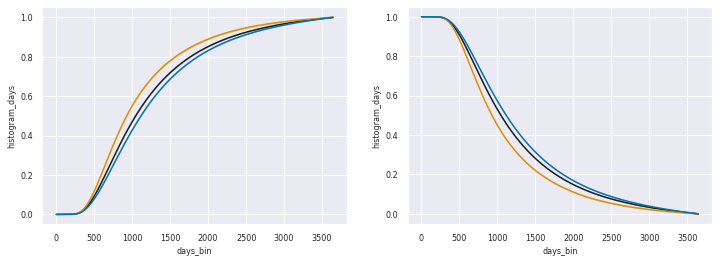

In [21]:
def plot_hist_with_errorbars(ds,roll,ax,colour,label='',dashes=[]):

    rolling = (ds.mean(dim='subsetno').rolling(days_bin=roll,center=True).mean())
    std = (ds.rolling(days_bin=roll,center=True).mean()).std(dim='subsetno')
    rolling.plot(ax=ax,color=colour,zorder=10,label=label,dashes=dashes)
    ax.fill_between(ds.days_bin.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.4,linewidth=0)
    return


fig,ax = plt.subplots(1,2,figsize = (12,4))

plot_hist_with_errorbars(h_total_cumsum_frac,1,ax[0],'k')
plot_hist_with_errorbars(h_labcu_cumsum_frac,1,ax[0],'C1')
plot_hist_with_errorbars(h_gulfs_cumsum_frac,1,ax[0],'C0')

plot_hist_with_errorbars(1-h_total_cumsum_frac,1,ax[1],'k')
plot_hist_with_errorbars(1-h_labcu_cumsum_frac,1,ax[1],'C1')
plot_hist_with_errorbars(1-h_gulfs_cumsum_frac,1,ax[1],'C0')
# h_tt_total.cumsum(dim='days_bin').std(dim='subsetno').isel(days_bin = slice(0,-1,1)).plot()

## construct normalizing curve

In [22]:
fill = np.ones(1464)

h_total_cumsum_frac_rev = (h_total_2010s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_total_1990s_cumsum_frac.days_bin[::-1])
h_total_cumsum_frac_inv_rev = (1-h_total_1990s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_total_1990s_cumsum_frac.days_bin[::-1])
normalize_total = np.concatenate([h_total_cumsum_frac_inv_rev,fill,h_total_cumsum_frac_rev])

h_labcu_cumsum_frac_rev = (h_labcu_2010s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_labcu_2010s_cumsum_frac.days_bin[::-1])
h_labcu_cumsum_frac_inv_rev = (1-h_labcu_1990s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_labcu_1990s_cumsum_frac.days_bin[::-1])
normalize_labcu = np.concatenate([h_labcu_cumsum_frac_inv_rev,fill,h_labcu_cumsum_frac_rev])

h_gulfs_cumsum_frac_rev = (h_gulfs_2010s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_gulfs_2010s_cumsum_frac.days_bin[::-1])
h_gulfs_cumsum_frac_inv_rev = (1-h_gulfs_1990s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_gulfs_1990s_cumsum_frac.days_bin[::-1])
normalize_gulfs = np.concatenate([h_gulfs_cumsum_frac_inv_rev,fill,h_gulfs_cumsum_frac_rev])

h_lcdir_cumsum_frac_rev = (h_lcdir_2010s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_lcdir_2010s_cumsum_frac.days_bin[::-1])
h_lcdir_cumsum_frac_inv_rev = (1-h_lcdir_1990s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_lcdir_1990s_cumsum_frac.days_bin[::-1])
normalize_lcdir = np.concatenate([h_lcdir_cumsum_frac_inv_rev,fill,h_lcdir_cumsum_frac_rev])

h_lc60w_cumsum_frac_rev = (h_lc60w_2010s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_lc60w_2010s_cumsum_frac.days_bin[::-1])
h_lc60w_cumsum_frac_inv_rev = (1-h_lc60w_1990s_cumsum_frac).mean(dim='subsetno').reindex(days_bin=h_lc60w_1990s_cumsum_frac.days_bin[::-1])
normalize_lc60w = np.concatenate([h_lc60w_cumsum_frac_inv_rev,fill,h_lc60w_cumsum_frac_rev])

In [23]:
normalize_total

array([-6.93889390e-18,  1.61285370e-04,  3.24601082e-04, ...,
        1.41574167e-04,  1.08755326e-04,  6.37152412e-05])

In [24]:
normalize_total = xr.DataArray(normalize_total,dims=["time"],
                                coords=dict(time=total_sum_sourcetime.time.data))
normalize_labcu = xr.DataArray(normalize_labcu,dims=["time"],
                                coords=dict(time=total_sum_sourcetime.time.data))
normalize_gulfs = xr.DataArray(normalize_gulfs,dims=["time"],
                                coords=dict(time=total_sum_sourcetime.time.data))
normalize_lcdir = xr.DataArray(normalize_lcdir,dims=["time"],
                                coords=dict(time=total_sum_sourcetime.time.data))
normalize_lc60w = xr.DataArray(normalize_lc60w,dims=["time"],
                                coords=dict(time=total_sum_sourcetime.time.data))


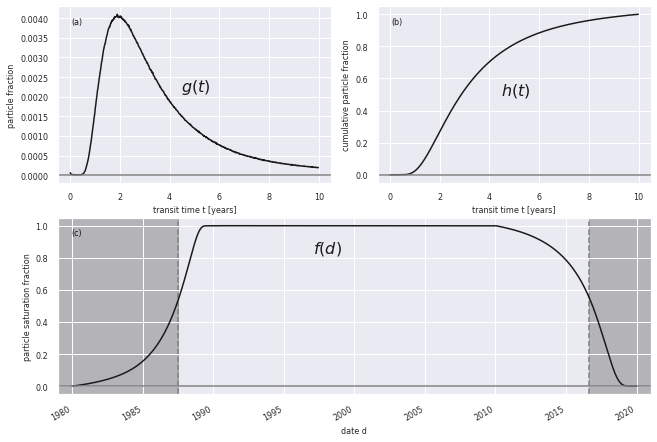

In [25]:
ntraj = h_tt_total.mean(dim='subsetno').isel(days_bin = slice(0,-1,1)).sum()

fig = plt.figure(figsize=(9, 6), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax00 = fig.add_subplot(spec[0, 0])
(h_tt_total.mean(dim='subsetno').isel(days_bin = slice(0,-1,1))/ntraj).plot(x='years_bin',ax=ax00,color='k')
ax00.set_ylabel('particle fraction')
ax00.set_xlabel('transit time t [years]')
ax00.axhline(color='gray')
ax00.text(0.05, 0.9, '(a)', horizontalalignment='left',transform=ax00.transAxes,color='k')
ax00.text(0.45, 0.52, r'$g(t)$', horizontalalignment='left',transform=ax00.transAxes,color='k',fontsize=16)

ax01 = fig.add_subplot(spec[0, 1])
h_total_cumsum_frac.mean(dim='subsetno').plot(x='years_bin',ax=ax01,color='k')
ax01.set_ylabel('cumulative particle fraction')
ax01.set_xlabel('transit time t [years]')
ax01.axhline(color='gray')
ax01.text(0.05, 0.9, '(b)', horizontalalignment='left',transform=ax01.transAxes,color='k')
ax01.text(0.45, 0.5, r'$h(t)$', horizontalalignment='left',transform=ax01.transAxes,color='k',fontsize=16)

ax1 = fig.add_subplot(spec[1, :])
normalize_total.plot(ax=ax1,color='k')
ax1.axhline(color='gray')
ax1.axvline(np.datetime64('1987-07-01'),color='gray',zorder = -1,linestyle = '--')
ax1.axvline(np.datetime64('2016-09-01'),color='gray',zorder = -1,linestyle = '--')
ax1.set_ylabel('particle saturation fraction')
ax1.set_xlabel('date d')
xmin=np.datetime64('1979-01-01')
xmax=np.datetime64('2021-01-01')
ax1.set_xlim(xmin,xmax)
left_threshold = np.datetime64('1987-07-01')
right_threshold = np.datetime64('2016-09-01')
ax1.axvspan(xmin, left_threshold, color='gray', alpha=0.5,zorder=-5)
ax1.axvspan(right_threshold, xmax, color='gray', alpha=0.5,zorder=-5)
ax1.text(0.023, 0.9, '(c)', horizontalalignment='left',transform=ax1.transAxes,color='k')
ax1.text(0.43, 0.8, r'$f(d)$', horizontalalignment='left',transform=ax1.transAxes,color='k',fontsize=16)

plt.savefig(project_path / figure_path / 'f04.png', bbox_inches='tight')
plt.savefig(project_path / figure_path / 'f04.pdf', bbox_inches='tight')




### add the normaize curve to the sourcetime sum datsets

In [26]:
total_sum_sourcetime = total_sum_sourcetime.assign(normalize_curve=normalize_total)
gulfs_sum_sourcetime = gulfs_sum_sourcetime.assign(normalize_curve=normalize_gulfs)
labcu_sum_sourcetime = labcu_sum_sourcetime.assign(normalize_curve=normalize_labcu)
lcdir_sum_sourcetime = lcdir_sum_sourcetime.assign(normalize_curve=normalize_lcdir)
lc60w_sum_sourcetime = lc60w_sum_sourcetime.assign(normalize_curve=normalize_lc60w)


In [29]:
labcu_sum_sourcetime.to_netcdf('labcu_sum_sourcetime_normalize.nc')


In [27]:
def plot_line_with_errorbars(ds,timeslice,roll,ax,colour,label=''):

    rolling = (ds.rolling(time=roll,center=True,min_periods=roll//2).mean().sum(dim='subsetno'))
    std = ((32*ds.rolling(time=roll,center=True,min_periods=roll//2).mean()).std(dim='subsetno'))
    rolling.isel(time=timeslice).plot(ax=ax,color=colour,zorder=10,label=label,linewidth=1)
    ax.fill_between(ds.isel(time=timeslice).time.data,
                    rolling.isel(time=timeslice)+1.96*std.isel(time=timeslice),
                    rolling.isel(time=timeslice)-1.96*std.isel(time=timeslice),
                    color=colour,zorder=1,alpha=0.5,linewidth=0)
    return


def plot_transports_by_osnap_and_sourcetime(total_0,
                                            labcu_0,
                                            gulfs_0,
                                            other_0,
                                            total_s,
                                            labcu_s,
                                            gulfs_s,
                                            other_s,
                                            roll_time,
                                            figname):
    
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(2,1,figsize = (8,5), sharex=True,gridspec_kw={'hspace': 0.05,'wspace': 0.05})

    plot_line_with_errorbars(total_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'k',label='total')
    plot_line_with_errorbars(total_0.vol_trans_normal-other_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'C0',label='total identified')
    plot_line_with_errorbars(labcu_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'C1',label='Labrador Sea')
    plot_line_with_errorbars(gulfs_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'C2',label='Gulf Stream')
    plot_line_with_errorbars(other_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'C7',label='other')
    
    plot_line_with_errorbars(((total_s.vol_trans_normal-other_s.vol_trans_normal)/total_s.normalize_curve),slice(547,2679,1),roll_time,ax[1],'C0',label='total identified')
    plot_line_with_errorbars((labcu_s.vol_trans_normal/labcu_s.normalize_curve),slice(547,2679,1),roll_time,ax[1],'C1',label='Labrador Sea')
    plot_line_with_errorbars((gulfs_s.vol_trans_normal/gulfs_s.normalize_curve),slice(547,2679,1),roll_time,ax[1],'C2',label='Gulf Stream')
    
    ax[0].set_ylabel('transport\nat OSNAP$_\mathrm{E}$ [Sv]')
    ax[0].set_xlabel('')
    ax[0].set_ylim(bottom=0,top=24)

#     lgd = ax[0].legend(loc='lower center',bbox_to_anchor=[0.5,-1.65],ncol=3)
    ax[1].set_ylabel('transport\nat source [Sv]')
    ax[1].set_xlabel('')
    ax[1].set_ylim(bottom=0,top=24)

    ax[0].text(0.02, 0.9, '(a)', horizontalalignment='left',transform=ax[0].transAxes,color='k')
    ax[1].text(0.02, 0.9, '(b)', horizontalalignment='left',transform=ax[1].transAxes,color='k')
    
    
    ax[0].text(0.6, 0.9, 'all tracks', horizontalalignment='left',transform=ax[0].transAxes,color='k')
    ax[0].text(0.05, 0.68, 'all sourced tracks', horizontalalignment='left',transform=ax[0].transAxes,color='C0')
    ax[0].text(0.6, 0.5, 'From Gulf Stream', horizontalalignment='left',transform=ax[0].transAxes,color='C2')
    ax[0].text(0.05, 0.3, 'From Lab Sea', horizontalalignment='left',transform=ax[0].transAxes,color='C1')
    ax[0].text(0.6, 0.13, 'non-sourced tracks', horizontalalignment='left',transform=ax[0].transAxes,color='C7')

    ax[1].text(0.65, 0.8, 'all sourced tracks', horizontalalignment='left',transform=ax[1].transAxes,color='C0')
    ax[1].text(0.65, 0.55, 'From Gulf Stream', horizontalalignment='left',transform=ax[1].transAxes,color='C2')
    ax[1].text(0.65, 0.15, 'From Lab Sea', horizontalalignment='left',transform=ax[1].transAxes,color='C1')



# #     plt.tight_layout()

# #     title=fig.suptitle('Volumes and transports across OSNAP line by source. 37 to 0 $\degree$W, upper 500 m.')
    
# #     plt.savefig(project_path / figure_path / 'plot_transports_by_source_37WtoScot_500M.eps', bbox_extra_artists=(lgd,))
#     plt.savefig(project_path / figure_path / Path(figname + '.png'),  bbox_inches='tight')
#     plt.savefig(project_path / figure_path / Path(figname + '.pdf'),  bbox_inches='tight')
    
    
    return

def plot_transports_by_path_by_osnap_and_sourcetime(total_0,
                                                    gulfs_0,
                                                    lc60w_0,
                                                    lcdir_0,
                                                    other_0,
                                                    total_s,
                                                    gulfs_s,
                                                    lc60w_s,
                                                    lcdir_s,
                                                    other_s,
                                                    roll_time,
                                                    figname):
    
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(2,figsize = (8,5), sharex=True,gridspec_kw={'hspace': 0.07,'wspace': 0.05})

    plot_line_with_errorbars(total_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'k',label='total')
    plot_line_with_errorbars(gulfs_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'C2',label='Gulf Stream')
    plot_line_with_errorbars(other_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'C7',label='other')
    plot_line_with_errorbars(lc60w_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'C3',label='loop path')
    plot_line_with_errorbars(lcdir_0.vol_trans_normal,slice(None,None,1),roll_time,ax[0],'C0',label='direct path')
    
    plot_line_with_errorbars((gulfs_s.vol_trans_normal/gulfs_s.normalize_curve),slice(547,2679,1),roll_time,ax[1],'C2',label='Gulf Stream')
    plot_line_with_errorbars((lc60w_s.vol_trans_normal/lc60w_s.normalize_curve),slice(547,2679,1),roll_time,ax[1],'C3',label='loop path')
    plot_line_with_errorbars((lcdir_s.vol_trans_normal/lcdir_s.normalize_curve),slice(547,2679,1),roll_time,ax[1],'C0',label='direct path')
        
    ax[0].set_ylabel('transport\nat OSNAP$_\mathrm{E}$ [Sv]')
    ax[0].set_xlabel('')
    ax[0].set_ylim(bottom=0,top=24)

#     lgd = ax[0].legend(loc='lower center',bbox_to_anchor=[0.5,-1.51],ncol=3)
    ax[1].set_ylabel('transport\nat source [Sv]')
    ax[1].set_xlabel('')
    ax[1].set_ylim(bottom=0,top=24)
    
    ax[0].text(0.02, 0.9, '(a)', horizontalalignment='left',transform=ax[0].transAxes,color='k')
    ax[1].text(0.02, 0.9, '(b)', horizontalalignment='left',transform=ax[1].transAxes,color='k')
    
    ax[0].text(0.6, 0.9, 'all tracks', horizontalalignment='left',transform=ax[0].transAxes,color='k')
    ax[0].text(0.4, 0.25, 'Lab Sea direct path', horizontalalignment='left',transform=ax[0].transAxes,color='C0')
    ax[0].text(0.02, 0.0, 'Lab Sea loop path', horizontalalignment='left',transform=ax[0].transAxes,color='C3')
    ax[0].text(0.65, 0.55, 'From Gulf Stream', horizontalalignment='left',transform=ax[0].transAxes,color='C2')
    ax[0].text(0.8, 0.13, 'other tracks', horizontalalignment='left',transform=ax[0].transAxes,color='C7')

    ax[1].text(0.4, 0.27, 'Lab Sea direct path', horizontalalignment='left',transform=ax[1].transAxes,color='C0')
    ax[1].text(0.7, 0.12, 'Lab Sea loop path', horizontalalignment='left',transform=ax[1].transAxes,color='C3')
    ax[1].text(0.65, 0.55, 'From Gulf Stream', horizontalalignment='left',transform=ax[1].transAxes,color='C2')


# #     plt.tight_layout()

# #     title=fig.suptitle('Volumes and transports across OSNAP line by source. 37 to 0 $\degree$W, upper 500 m.')
    
# #     plt.savefig(project_path / figure_path / 'plot_transports_by_source_37WtoScot_500M.eps', bbox_extra_artists=(lgd,))
    plt.savefig(project_path / figure_path / Path(figname + '.png'), bbox_inches='tight')
    plt.savefig(project_path / figure_path / Path(figname + '.pdf'), bbox_inches='tight')
    
    
    return


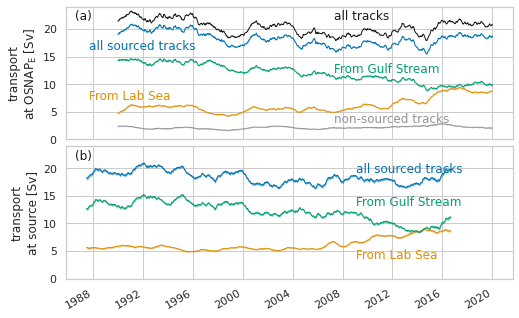

In [28]:
plot_transports_by_osnap_and_sourcetime(total_sum_0,
                                        labcu_sum_0,
                                        gulfs_sum_0,
                                        other_sum_0,
                                        total_sum_sourcetime,
                                        labcu_sum_sourcetime,
                                        gulfs_sum_sourcetime,
                                        other_sum_sourcetime,
                                        73,
                          'test')

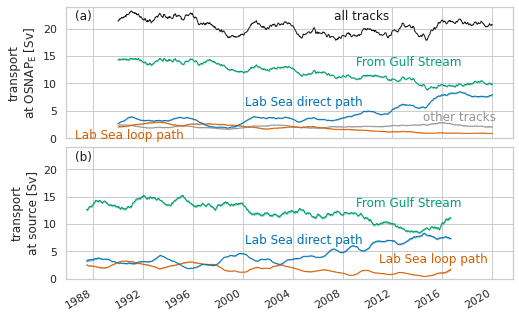

In [29]:
plot_transports_by_path_by_osnap_and_sourcetime(total_sum_0,
                                                gulfs_sum_0,
                                                lc60w_sum_0,
                                                lcdir_sum_0,
                                                other_sum_0,
                                                total_sum_sourcetime,
                                                gulfs_sum_sourcetime,
                                                lc60w_sum_sourcetime,
                                                lcdir_sum_sourcetime,
                                                other_sum_sourcetime,
                                                73,
                          'f05')

In [30]:
def plot_ts_with_errorbars(ds,roll,ax,colour,label='',dashes=[],zorder=10):

    rolling = (ds.mean(dim='subsetno').rolling(time=roll,center=True).mean())
    std = ((ds.rolling(time=roll,center=True).mean()).std(dim='subsetno'))
    rolling.plot(ax=ax,color=colour,label=label,dashes=dashes,zorder=zorder)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.4,linewidth=0)
    return


def plot_ts_by_source_2(total_mean_a,labcu_mean_a,gulfs_mean_a,other_mean_a,
                                total_mean_b,labcu_mean_b,gulfs_mean_b,other_mean_b,
                                mean_window,
                                figname):
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(1,2,figsize = (9,5),sharex=True)

#     plot_ts_with_errorbars(labcu_mean_b.salt,mean_window,ax[0],'C1',label='Labrador Sea')
#     plot_ts_with_errorbars(gulfs_mean_b.salt,mean_window,ax[0],'C2',label='Gulf Stream')
    plot_ts_with_errorbars(total_mean_b.salt,mean_window,ax[0],'k',label='total')
    
    plot_ts_with_errorbars(total_mean_a.salt,mean_window,ax[0],'k',label='total',dashes=[10, 6],zorder=10)
    plot_ts_with_errorbars(labcu_mean_a.salt,mean_window,ax[0],'C1',label='Labrador Sea',zorder=9)
    plot_ts_with_errorbars(gulfs_mean_a.salt,mean_window,ax[0],'C2',label='Gulf Stream',zorder=8)
    plot_ts_with_errorbars(other_mean_a.salt,mean_window,ax[0],'C7',label='other',zorder=7)
    
    ax[0].set_ylabel('salinity [PSU]')
    ax[0].set_xlabel('')
    ax[0].yaxis.set_ticks(np.arange(34, 36, 0.2))
    
    ax[0].text(0.05, 0.75, 'Total at OSNAP$_\mathrm{E}$', horizontalalignment='left',transform=ax[0].transAxes)
    ax[0].text(0.05, 0.6, 'Total at source', horizontalalignment='left',transform=ax[0].transAxes)
    ax[0].text(0.05, 0.85, 'Gulf Stream at source', horizontalalignment='left',transform=ax[0].transAxes,color='C2')
    ax[0].text(0.4, 0.1, 'Labrador Sea at source', horizontalalignment='left',transform=ax[0].transAxes,color='C1')
    ax[0].text(0.05, 0.4, 'Other at source', horizontalalignment='left',transform=ax[0].transAxes,color='C7')

        
#     plot_ts_with_errorbars(labcu_mean_b.temp,mean_window,ax[1],'C1',label='Labrador Sea')
#     plot_ts_with_errorbars(gulfs_mean_b.temp,mean_window,ax[1],'C2',label='Gulf Stream')
    plot_ts_with_errorbars(total_mean_b.temp,mean_window,ax[1],'k',label='total')
    
    plot_ts_with_errorbars(total_mean_a.temp,mean_window,ax[1],'k',label='total',dashes=[10, 6],zorder=10)
    plot_ts_with_errorbars(labcu_mean_a.temp,mean_window,ax[1],'C1',label='Labrador Sea',zorder=9)
    plot_ts_with_errorbars(gulfs_mean_a.temp,mean_window,ax[1],'C2',label='Gulf Stream',zorder=8)
    plot_ts_with_errorbars(other_mean_a.temp,mean_window,ax[1],'C7',label='other',zorder=7)

    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.tick_right()    
    ax[1].set_ylabel('temperature [$\degree$C]')
    ax[1].set_xlabel('')
    ax[1].text(0.4, 0.42, 'Total at OSNAP$_\mathrm{E}$', horizontalalignment='left',transform=ax[1].transAxes)
    ax[1].text(0.5, 0.7, 'Total at source', horizontalalignment='left',transform=ax[1].transAxes)
    ax[1].text(0.05, 0.82, 'Gulf Stream at source', horizontalalignment='left',transform=ax[1].transAxes,color='C2')
    ax[1].text(0.05, 0.15, 'Labrador Sea at source', horizontalalignment='left',transform=ax[1].transAxes,color='C1')
    ax[1].text(0.05, 0.53, 'Other', horizontalalignment='left',transform=ax[1].transAxes,color='C7')
    
    ax[0].text(0.02, 0.95, '(a)', horizontalalignment='left',transform=ax[0].transAxes,color='k')
    ax[1].text(0.02, 0.95, '(b)', horizontalalignment='left',transform=ax[1].transAxes,color='k')

    plt.tight_layout()

#     title=fig.suptitle('transportweighted_mean_properties_by_source')
    plt.savefig(project_path / figure_path / Path(figname + '.png'), bbox_inches='tight')
    plt.savefig(project_path / figure_path / Path(figname + '.pdf'), bbox_inches='tight')
    
    
    return

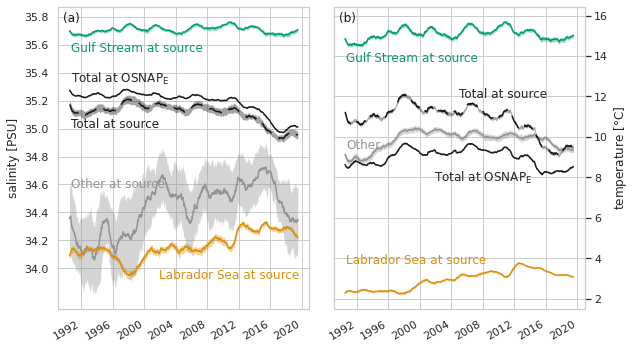

In [31]:
plot_ts_by_source_2(total_mean_1,
                  labcu_mean_1,
                  gulfs_mean_1,
                  other_mean_1,
                  total_mean_0,
                  labcu_mean_0,
                  gulfs_mean_0,
                  other_mean_0,
                  73,
                  'f06')

In [50]:
def plot_ts_with_errorbars(ds,roll,ax,colour,label='',dashes=[]):

    rolling = (ds.mean(dim='subsetno').rolling(time=roll,center=True).mean())
    std = (ds.rolling(time=roll,center=True).mean()).std(dim='subsetno')
    rolling.plot(ax=ax,color=colour,zorder=10,label=label,dashes=dashes)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.4,linewidth=0)
    return


def plot_salinity_breakdown_2(total_mean_a,
                            labcu_mean_a,
                            gulfs_mean_a,
                            other_mean_a,
                            total_mean_b,
                            labcu_mean_b,
                            gulfs_mean_b,
                            other_mean_b,
                            total_sum_a,
                            labcu_sum_a,
                            gulfs_sum_a,
                            other_sum_a,
                            total_sum_b,
                            labcu_sum_b,
                            gulfs_sum_b,
                            other_sum_b,
                            mean_window,
                            figname):
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(4,2,figsize = (12,12),sharex=True,gridspec_kw={'wspace': 0.1,'hspace': 0.1})
    
# salinity    
    
    st_o = total_mean_b.salt
    sl = labcu_mean_a.salt
    sg = gulfs_mean_a.salt
    so = other_mean_a.salt
    
    slbar = sl.mean(dim='time') * sl/sl
    sldash = sl - slbar
    sgbar = sg.mean(dim='time') * sg/sg
    sgdash = sg - sgbar
    sobar = so.mean(dim='time') * so/so
    sodash = so - sobar
    
    vt_o = total_sum_b.vol_trans_normal
    vl = labcu_sum_a.vol_trans_normal
    vg = gulfs_sum_a.vol_trans_normal
    vo = other_sum_a.vol_trans_normal
    
    vlbar = vl.mean(dim='time') * vl/vl
    vldash = vl - vlbar
    vgbar = vg.mean(dim='time') * vg/vg
    vgdash = vg - vgbar
    vobar = vo.mean(dim='time') * vo/vo
    vodash = vo - vobar

    plot_ts_with_errorbars(st_o - st_o.mean(dim='time'),
                           mean_window,
                           ax[0,0],
                           'k',
                           label='at OSNAP-E')

    plot_ts_with_errorbars(((sl*vl + sg*vg + so*vo)/vt_o)-
                           ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time'),
                           mean_window,
                           ax[0,0],
                           'C0',
                           label='at source')

    plot_ts_with_errorbars(((st_o-(sl*vl + sg*vg + so*vo)/vt_o))-
                           ((st_o-(sl*vl + sg*vg + so*vo)/vt_o)).mean(dim='time'),
                           mean_window,
                           ax[0,0],
                           'C4',
                           label='in transit')


    
#     ax[0,0].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[0,0].set_ylabel('salinity anomaly [PSU]')
    ax[0,0].set_xlabel('')

    ax[0,0].text(0.05, 0.82, 'at OSNAP$_\mathrm{E}$', horizontalalignment='left',transform=ax[0,0].transAxes)
    ax[0,0].text(0.05, 0.42, 'at source', horizontalalignment='left',transform=ax[0,0].transAxes,color='C0')
    ax[0,0].text(0.5, 0.42, 'transit', horizontalalignment='left',transform=ax[0,0].transAxes,color='C4')
    
    
   
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[1,0],
                           colour='C0',
                           label='at source')
    
    plot_ts_with_errorbars((((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar))-
                            ((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,0],
                           colour='C3',
                           label='due to Lab Sea source transport')
    
    plot_ts_with_errorbars((((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                           ((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,0],
                           colour='C7',
                           label='due to Lab Sea source salinity')

    ax[1,0].set_ylabel('salinity anomaly [PSU]')
    ax[1,0].set_xlabel('')

    ax[1,0].text(0.35, 0.37, 'Lab Sea transport [$V_l$]', horizontalalignment='left',transform=ax[1,0].transAxes,color='C3')
    ax[1,0].text(0.7, 0.15, 'Source', horizontalalignment='left',transform=ax[1,0].transAxes,color='C0')
    ax[1,0].text(0.77, 0.77, 'Lab Sea\nsalinity [$\overline{S_l}$]', horizontalalignment='left',transform=ax[1,0].transAxes,color='C7')
    
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[2,0],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar))-
                            ((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar)).mean(dim='time')),
                           mean_window,
                           ax[2,0],
                           colour='C3',
                           label='due to Gulf Stream source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[2,0],
                           colour='C7',
                           label='from Gulf Stream source salinity')
    
    ax[2,0].set_ylabel('salinity anomaly [PSU]')
    ax[2,0].set_xlabel('')

    ax[2,0].text(0.25, 0.37, 'Gulf Stream transport [$V_g$]', horizontalalignment='left',transform=ax[2,0].transAxes,color='C3')
    ax[2,0].text(0.7, 0.15, 'Source', horizontalalignment='left',transform=ax[2,0].transAxes,color='C0')
    ax[2,0].text(0.77, 0.70, 'Gulf Stream\nsalinity [$\overline{S_g}$]', horizontalalignment='left',transform=ax[2,0].transAxes,color='C7')
    
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[3,0],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vgbar + sobar*vo)/(vlbar+vgbar+vo))-
                            ((slbar*vlbar + sgbar*vgbar + sobar*vo)/(vlbar+vgbar+vo)).mean(dim='time')),
                           mean_window,
                           ax[3,0],
                           colour='C3',
                           label='due to Gulf Stream source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[3,0],
                           colour='C7',
                           label='from Gulf Stream source salinity')
    
    ax[3,0].set_ylabel('salinity anomaly [PSU]')
    ax[3,0].set_xlabel('')

    ax[3,0].text(0.25, 0.47, 'Other transport [$V_u$]', horizontalalignment='left',transform=ax[3,0].transAxes,color='C3')
    ax[3,0].text(0.7, 0.15, 'Source', horizontalalignment='left',transform=ax[3,0].transAxes,color='C0')
    ax[3,0].text(0.75, 0.67, 'Other\nsalinity [$\overline{S_u}$]', horizontalalignment='left',transform=ax[3,0].transAxes,color='C7')

# temperature    

    st_o = total_mean_b.temp
    sl = labcu_mean_a.temp
    sg = gulfs_mean_a.temp
    so = other_mean_a.temp
    
    slbar = sl.mean(dim='time') * sl/sl
    sldash = sl - slbar
    sgbar = sg.mean(dim='time') * sg/sg
    sgdash = sg - sgbar
    sobar = so.mean(dim='time') * so/so
    sodash = so - sobar
    
    plot_ts_with_errorbars(st_o - st_o.mean(dim='time'),
                           mean_window,
                           ax[0,1],
                           'k',
                           label='at OSNAP-E')

    plot_ts_with_errorbars(((sl*vl + sg*vg + so*vo)/vt_o)-
                           ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time'),
                           mean_window,
                           ax[0,1],
                           'C0',
                           label='at source')

    plot_ts_with_errorbars(((st_o-(sl*vl + sg*vg + so*vo)/vt_o))-
                           ((st_o-(sl*vl + sg*vg + so*vo)/vt_o)).mean(dim='time'),
                           mean_window,
                           ax[0,1],
                           'C4',
                           label='in transit')


    
#     ax[0,1].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[0,1].yaxis.set_label_position("right")
    ax[0,1].yaxis.tick_right()
    ax[0,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[0,1].set_xlabel('')

    ax[0,1].text(0.82, 0.5, 'OSNAP$_\mathrm{E}$', horizontalalignment='left',transform=ax[0,1].transAxes)
    ax[0,1].text(0.68, 0.15, 'Source', horizontalalignment='left',transform=ax[0,1].transAxes,color='C0')
    ax[0,1].text(0.7, 0.82, 'Transit', horizontalalignment='left',transform=ax[0,1].transAxes,color='C4')
    
   
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[1,1],
                           colour='C0',
                           label='at source')
    
    plot_ts_with_errorbars((((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar))-
                            ((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,1],
                           colour='C3',
                           label='due to Lab Sea source transport')
    
    plot_ts_with_errorbars((((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                           ((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,1],
                           colour='C7',
                           label='due to Lab Sea source temperature')
    ax[1,1].yaxis.set_label_position("right")
    ax[1,1].yaxis.tick_right()
    ax[1,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[1,1].set_xlabel('')

    ax[1,1].text(0.30, 0.42, 'Lab Sea transport [$V_l$]', horizontalalignment='left',transform=ax[1,1].transAxes,color='C3')
    ax[1,1].text(0.68, 0.15, 'Source', horizontalalignment='left',transform=ax[1,1].transAxes,color='C0')
    ax[1,1].text(0.73, 0.70, 'Lab Sea\ntemperature\n[$\overline{T_l}$]', horizontalalignment='left',transform=ax[1,1].transAxes,color='C7')

    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[2,1],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar))-
                            ((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar)).mean(dim='time')),
                           mean_window,
                           ax[2,1],
                           colour='C3',
                           label='due to Gulf Stream source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[2,1],
                           colour='C7',
                           label='due to Gulf Stream source temperature')
    
    ax[2,1].yaxis.set_label_position("right")
    ax[2,1].yaxis.tick_right()
    ax[2,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[2,1].set_xlabel('')

    ax[2,1].text(0.20, 0.42, 'Gulf Stream transport [$V_g$]', horizontalalignment='left',transform=ax[2,1].transAxes,color='C3')
    ax[2,1].text(0.68, 0.15, 'Source', horizontalalignment='left',transform=ax[2,1].transAxes,color='C0')
    ax[2,1].text(0.73, 0.67, 'Gulf Stream\ntemperature\n[$\overline{T_g}$]', horizontalalignment='left',transform=ax[2,1].transAxes,color='C7')

    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[3,1],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vgbar + sobar*vo)/(vlbar+vgbar+vo))-
                            ((slbar*vlbar + sgbar*vgbar + sobar*vo)/(vlbar+vgbar+vo)).mean(dim='time')),
                           mean_window,
                           ax[3,1],
                           colour='C3',
                           label='due to Other source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vgbar + so*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sgbar*vgbar + so*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[3,1],
                           colour='C7',
                           label='due to Other source temperature')
    
    ax[3,1].yaxis.set_label_position("right")
    ax[3,1].yaxis.tick_right()
    ax[3,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[3,1].set_xlabel('')

    ax[3,1].text(0.25, 0.45, 'Other transport [$V_u$]', horizontalalignment='left',transform=ax[3,1].transAxes,color='C3')
    ax[3,1].text(0.68, 0.15, 'Source', horizontalalignment='left',transform=ax[3,1].transAxes,color='C0')
    ax[3,1].text(0.75, 0.65, 'Other\ntemperature\n[$\overline{T_u}$]', horizontalalignment='left',transform=ax[3,1].transAxes,color='C7')

    ax[0,0].text(0.02, 0.92, '(a)', horizontalalignment='left',transform=ax[0,0].transAxes,color='k')
    ax[0,1].text(0.02, 0.92, '(b)', horizontalalignment='left',transform=ax[0,1].transAxes,color='k')
    ax[1,0].text(0.02, 0.92, '(c)', horizontalalignment='left',transform=ax[1,0].transAxes,color='k')
    ax[1,1].text(0.02, 0.92, '(d)', horizontalalignment='left',transform=ax[1,1].transAxes,color='k')
    ax[2,0].text(0.02, 0.92, '(e)', horizontalalignment='left',transform=ax[2,0].transAxes,color='k')
    ax[2,1].text(0.02, 0.92, '(f)', horizontalalignment='left',transform=ax[2,1].transAxes,color='k')
    ax[3,0].text(0.02, 0.92, '(g)', horizontalalignment='left',transform=ax[3,0].transAxes,color='k')
    ax[3,1].text(0.02, 0.92, '(h)', horizontalalignment='left',transform=ax[3,1].transAxes,color='k')
   
#     ax[4].set_xlabel('')

    plt.savefig(project_path / figure_path / Path(figname + '.png'), bbox_inches='tight')
    plt.savefig(project_path / figure_path / Path(figname + '.pdf'), bbox_inches='tight')
    
    
    return

In [ ]:
plot_salinity_breakdown_2(total_mean_1,
                        labcu_mean_1,
                        gulfs_mean_1,
                        other_mean_1,
                        total_mean_0,
                        labcu_mean_0,
                        gulfs_mean_0,
                        other_mean_0,
                        total_sum_1,
                        labcu_sum_1,
                        gulfs_sum_1,
                        other_sum_1,
                        total_sum_0,
                        labcu_sum_0,
                        gulfs_sum_0,
                        other_sum_0,
                        73,
                        'f07')